<a href="https://colab.research.google.com/github/IreneJeong/Project-Storage/blob/main/Cifar_100_Simple_and_3_TLs_with_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:purple; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Data Loading & Preprocess](#1)
* [Visualization of the images](#2)
* [Build the VGG like Model Architecture](#3)
  * [Evaluate Model](#4)
  * [Data Augmentation](#5)
  * [Hyper-parameter Tuning](#6)
* [Additional Trial 1. Transfer Learning (ResNet50)](#7)
  * [Evaluate Model](#7-4)
  * [Hyper-parameter Tunning](#7-5)
* [Additional Trial 2. Transfer Learning (EfficientNetB0)](#8)
  * [Evaluate Model](#8-4)
  * [Hyper-parameter Tunning](#8-5)
* [Additional Trail 4. Transfer Learning (e)](#9)
  * [Evaluate Model](#9-4)
  * [Hyper-parameter Tunning](#9-5)


<a id="1"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Data Loading & Preprocess<center><h3>

### Data Loading

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [ ]:
# Data Loading 
(X_train_fine, y_train_fine), (X_test_fine, y_test_fine) = cifar100.load_data(label_mode='fine')
"""
When set to 'fine', the data is loaded with 100 fine-grained classes. (Classes)
When set to 'coarse', the data is loaded with 20 coarse-grained classes, (Super Classes)
where each coarse-grained class contains five fine-grained classes.
"""

169001437/169001437 [==============================] - 2s 0us/step


"\nWhen set to 'fine', the data is loaded with 100 fine-grained classes. (Classes)\nWhen set to 'coarse', the data is loaded with 20 coarse-grained classes, (Super Classes)\nwhere each coarse-grained class contains five fine-grained classes.\n"

In [ ]:
print(np.unique(y_train_fine))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
print(X_train_fine.shape)
print(y_train_fine.shape)
print(X_test_fine.shape)
print(y_test_fine.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
(X_train_coarse, y_train_coarse), (X_test_coarse, y_test_coarse) = cifar100.load_data(label_mode='coarse')

In [ ]:
print(np.unique(y_train_coarse))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
print(X_train_coarse.shape)
print(y_train_coarse.shape)
print(X_test_coarse.shape)
print(y_test_coarse.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train_fine[:,0]

array([19, 29,  0, ...,  3,  7, 73])

In [ ]:
y_train_coarse[:,0]

array([11, 15,  4, ...,  8,  7,  1])

In [ ]:
# Dataset class labels
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin',  'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
# Dataset super class labels
superclasses = [ "aquatic_mammals","fish","flowers","food_containers","fruit_and_vegetables","household_electrical_devices","household_furniture","insects","large_carnivores","large_man-made_outdoor_things",
                "large_natural_outdoor_scenes","large_omnivores_and_herbivores","medium_mammals","non-insect_invertebrates","people","reptiles","small_mammals","trees","vehicles_1","vehicles_2"]

### Initial setting & Pre-processing



In [ ]:
import numpy as np
import random
import tensorflow as tf
import os


def set_seed(seed=42):
    '''
    Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)


In [ ]:
set_seed

<function __main__.set_seed(seed=42)>

In [ ]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 50
N_CLASSES = len(labels)
#SUP_CLASSES = len(superclasses)
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
image_size = 32

print('Variables initialisation')

Variables initialisation


In [ ]:
# Initial shape is (32,32,3), but depends on the transfer learning method this can be modified with below class.
import cv2

def resize_img(img, image_size):
    return cv2.resize(img, (image_size, image_size), interpolation=cv2.INTER_CUBIC)

In [ ]:
output_y_train = utils.to_categorical(y_train_fine, N_CLASSES)
output_y_test = utils.to_categorical(y_test_fine, N_CLASSES)

In [ ]:
# convert to categorical (Fine & corase labels)
"""
fine_labels = utils.to_categorical(y_train_fine, N_CLASSES)
coarse_labels = utils.to_categorical(y_train_coarse, SUP_CLASSES)
output_Y_train = [fine_labels, coarse_labels]

fine_labels = utils.to_categorical(y_test_fine, N_CLASSES)
coarse_labels = utils.to_categorical(y_test_coarse, SUP_CLASSES)
output_Y_test = [fine_labels, coarse_labels]
"""

'\nfine_labels = utils.to_categorical(y_train_fine, N_CLASSES)\ncoarse_labels = utils.to_categorical(y_train_coarse, SUP_CLASSES)\noutput_Y_train = [fine_labels, coarse_labels]\n\nfine_labels = utils.to_categorical(y_test_fine, N_CLASSES)\ncoarse_labels = utils.to_categorical(y_test_coarse, SUP_CLASSES)\noutput_Y_test = [fine_labels, coarse_labels]\n'

In [ ]:
print("There are {} images, the image size is {} x {} and the channel size is {}".format(X_train_fine.shape[0], X_train_fine.shape[1],X_train_fine.shape[2], X_train_fine.shape[3]))

There are 50000 images, the image size is 32 x 32 and the channel size is 3


In [ ]:
# float and normalization
input_X_train = X_train_fine.astype('float32')
input_X_test = X_test_fine.astype('float32')
input_X_train /= 255
input_X_test /= 255

print('Output: One-hot encoding , Input: Normalize - completed')

Output: One-hot encoding , Input: Normalize - completed



<a id="2"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Visulaization of the Images<center><h3>

### Visulaization

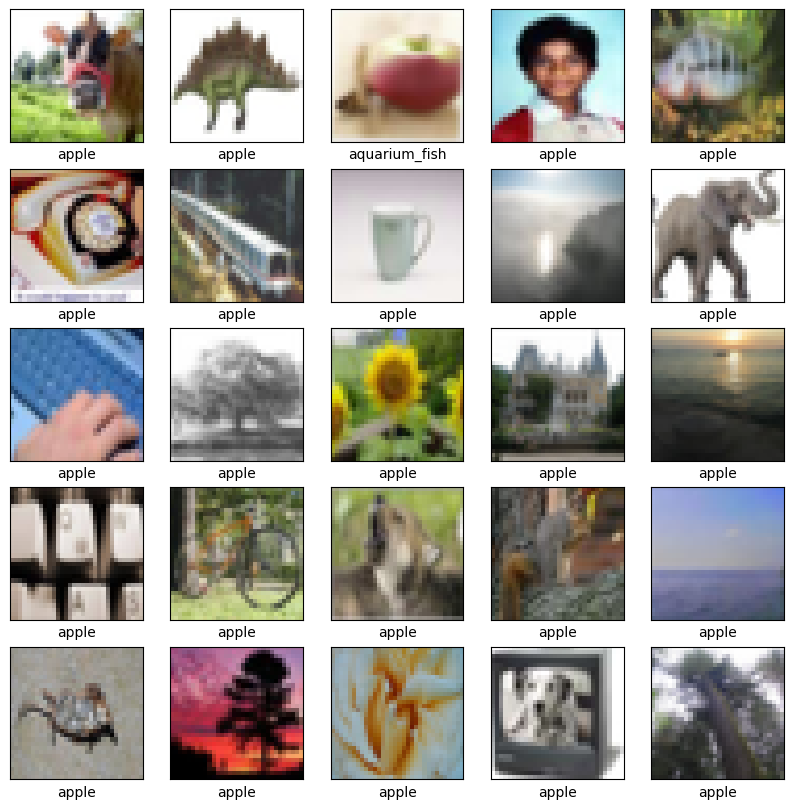

In [ ]:
plt.figure(figsize=(10,10)) 

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(input_X_train[i], cmap="gray")
  plt.xlabel(labels[output_y_train[i].astype(int)[0]])
#  plt.xlabel(labels[np.argmax(output_Y_train[0][i])] + " / " + labels[np.argmax(output_Y_train[1][i])])

plt.show()

In [ ]:
#Define the function for plotting the history of the training of the model
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

### Model Building

<a id="3"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Build the VGG like Model Architecture<center><h3>

In [ ]:
# Model Build 
"""
After tried very simple CNN model with CIFAR-10, the result was not so ideal. 
Thus, bit more complex model has been applied as the baseline in this note. 
"""

# Complex DNN model definition - Commonly used CNN architecture "VGG-like"
baseline = Sequential()
 
baseline.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(image_size, image_size, IMG_CHANNELS)))
baseline.add(Activation('relu'))
baseline.add(Conv2D(32, kernel_size=3, padding='same'))
baseline.add(Activation('relu'))
baseline.add(MaxPooling2D(pool_size=(2, 2)))
baseline.add(Dropout(0.25))
 
baseline.add(Conv2D(64, kernel_size=3, padding='same'))
baseline.add(Activation('relu'))
baseline.add(Conv2D(64, 3, 3))
baseline.add(Activation('relu'))
baseline.add(MaxPooling2D(pool_size=(2, 2)))
baseline.add(Dropout(0.25))
 
baseline.add(Flatten())
baseline.add(Dense(512))
baseline.add(Activation('relu'))
baseline.add(Dropout(0.5))
baseline.add(Dense(N_CLASSES))
baseline.add(Activation('softmax'))
 

#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
baseline.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

baseline.summary()

# training/fitting of the complex DNN model 
history = baseline.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_26 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_27 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [ ]:
"""
# Define model architecture
from keras.models import Model
from keras.layers import Input

inputs = Input(shape=(image_size, image_size, IMG_CHANNELS))

x = Conv2D(32, kernel_size=3, padding='same', input_shape=(image_size, image_size, IMG_CHANNELS))(inputs)
x = Activation('relu')(x)
x = Conv2D(32, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

outputs1 = Dense(N_CLASSES, activation='softmax', name='coarse_output')(x)
outputs2 = Dense(SUP_CLASSES, activation='softmax', name='fine_output')(x)

model = Model(inputs=inputs, outputs=[outputs1, outputs2])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_fine, y_train_fine, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)
"""

<a id="4"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Evaluate the Model<center><h3>

313/313 - 1s - loss: 2.2789 - accuracy: 0.4111 - 831ms/epoch - 3ms/step
test accuracy:  0.41110000014305115


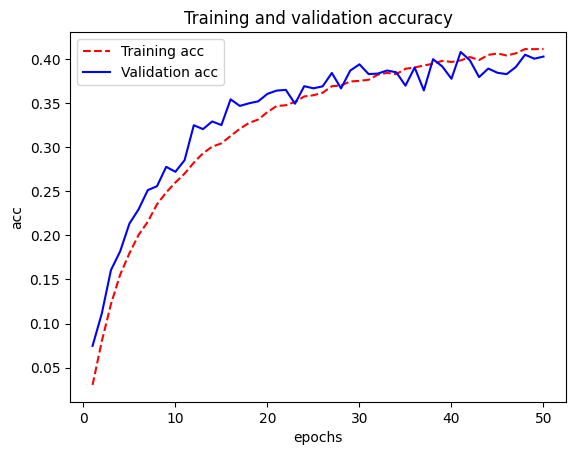

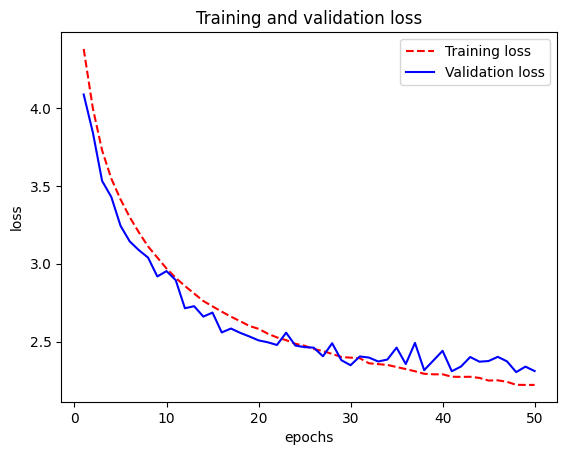

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_history(history)
test_loss,test_acc=baseline.evaluate(input_X_test, output_y_test, verbose=2)

print("test accuracy: ",test_acc)

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the Keras model to be tuned
def create_model(filters=16, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size=3, padding='same', input_shape=(image_size, image_size, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(filters*2, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters*2, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))

    optimizer = RMSprop(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# create the model
model = KerasClassifier(build_fn=create_model, verbose=1)

# define the hyperparameter grid to search
param_grid = {
    'batch_size': [32, 64, 128, 256],
    'epochs': [50, 100],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01],
    'filters': [16, 32]
}

# create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# fit the GridSearchCV object to the data
grid_result = grid.fit(input_X_train, output_y_train)

# print the best results
print(f"Best Accuracy: {grid_result.best_score_:.2%}")
print(f"Best Parameters: {grid_result.best_params_}")


<ipython-input-45-debdf315239e>:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8003 - accuracy: 0.3112
Epoch 50/100
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8109 - accuracy: 0.3086
Epoch 51/100
1042/1042 [==============================] - 5s 4ms/step - loss: 2.8073 - accuracy: 0.3117
Epoch 52/100
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8135 - accuracy: 0.3103
Epoch 53/100
1042/1042 [==============================] - 5s 4ms/step - loss: 2.8206 - accuracy: 0.3105
Epoch 54/100
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8178 - accuracy: 0.3088
Epoch 55/100
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8163 - accuracy: 0.3066
Epoch 56/100
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8382 - accuracy: 0.3031
Epoch 57/100
1042/1042 [==============================] - 5s 5ms/step - loss: 2.8436 - accuracy: 0.3015
Epoch 58/100
1042/1042 [=================

<a id="5"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Data Augmentation<center><h3>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            featurewise_center=False,  # set input mean to 0 over the dataset
                            samplewise_center=False,  # set each sample mean to 0
                            featurewise_std_normalization=False,  # divide inputs by std of the dataset
                            samplewise_std_normalization=False,  # divide each input by its std
                            zca_whitening=False,  # apply ZCA whitening - (std, mean, and principal components if ZCA whitening is applied).
                            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
                            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                            horizontal_flip=True,  # randomly flip images
                            vertical_flip=False  # randomly flip images
                             )  

datagen.fit(input_X_train) # Train and Valid both augmented !!

In [ ]:
# Model Build 
"""
After tried very simple CNN model with CIFAR-10, the result was not so ideal. 
Thus, bit more complex model has been applied as the baseline in this note. 
"""

# Complex DNN model definition - Commonly used CNN architecture "VGG-like"
baseline = Sequential()
 
baseline.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(image_size, image_size, IMG_CHANNELS)))
baseline.add(Activation('relu'))
baseline.add(Conv2D(32, kernel_size=3, padding='same'))
baseline.add(Activation('relu'))
baseline.add(MaxPooling2D(pool_size=(2, 2)))
baseline.add(Dropout(0.25))
 
baseline.add(Conv2D(64, kernel_size=3, padding='same'))
baseline.add(Activation('relu'))
baseline.add(Conv2D(64, 3, 3))
baseline.add(Activation('relu'))
baseline.add(MaxPooling2D(pool_size=(2, 2)))
baseline.add(Dropout(0.25))
 
baseline.add(Flatten())
baseline.add(Dense(512))
baseline.add(Activation('relu'))
baseline.add(Dropout(0.5))
baseline.add(Dense(N_CLASSES))
baseline.add(Activation('softmax'))
 

#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
baseline.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

baseline.summary()

# training/fitting of the complex DNN model 
history = baseline.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [ ]:
plot_history(history)
test_loss,test_acc_ag=model.evaluate(X_test_ag, Y_test_ag, verbose=2)

print("test accuracy: ",test_acc_ag)

### Batch Normalization

In [ ]:
# Batch norm model 4
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 32, 32, 256)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 256)      1024      
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 256)      

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
import time
training_start = time.time()
history = model.fit(input_X_train, output_y_train, 
          batch_size=64,
          epochs=350,
          validation_split=0.2,
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/350
625/625 [==============================] - 6001s 10s/step - loss: 4.0186 - acc: 0.1051 - val_loss: 3.8822 - val_acc: 0.1128
Epoch 2/350
625/625 [==============================] - 6067s 10s/step - loss: 3.1696 - acc: 0.2269 - val_loss: 2.7850 - val_acc: 0.3002
Epoch 3/350
625/625 [==============================] - 6011s 10s/step - loss: 2.6177 - acc: 0.3300 - val_loss: 2.5080 - val_acc: 0.3590
Epoch 4/350
625/625 [==============================] - 5962s 10s/step - loss: 2.2444 - acc: 0.4076 - val_loss: 2.2338 - val_acc: 0.4143
Epoch 5/350
575/625 [==========================>...] - ETA: 6:54 - loss: 1.9668 - acc: 0.4737

In [ ]:
plot_history(history)
test_loss,test_acc_hp=model.evaluate(input_X_test, y_test, verbose=2)

print("test accuracy: ",test_acc_hp)

### ResNet50

<a id="7"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 1. Transfer Learning (ResNet50)<center><h3>

In [ ]:
X_train_1 = input_X_train
Y_train_1 = output_Y_train
X_test_1 = input_X_test
Y_test_1 = output_Y_test

<a id="7-4"></a>
<h4 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 1. Evaluate the model<center><h4>

In [ ]:
plot_history(history)
test_loss,test_acc1=model.evaluate(X_test_1, Y_test_1, verbose=2)

print("test accuracy: ",test_acc1)

<a id="7-5"></a>
<h4 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 1. Hyper-parameter Tuning<center><h4>

### EfficientNetB0

<a id="8"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 2. Transfer Learning (EfficientNetB0)<center><h3>

https://github.com/chetnakhanna16/CIFAR100_ImageRecognition/blob/master/EffiicientNetB0_CIFAR100.ipynb

In [ ]:
X_train_2 = input_X_train
Y_train_2 = output_Y_train
X_test_2 = input_X_test
Y_test_2 = output_Y_test

In [ ]:
#resizing the images as per EfficientNetB0 to size (224, 224)
image_size = 224
channels = 3

In [ ]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, images, labels=None, mode='fit', batch_size=batch_size, dim=(height, width), channels=channels, n_classes=n_classes, shuffle=True, augment=False):
        
        #initializing the configuration of the generator
        self.images = images
        self.labels = labels
        self.mode = mode
        self.batch_size = batch_size
        self.dim = dim
        self.channels = channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
   
    #method to be called after every epoch
    def on_epoch_end(self):
        self.indexes = np.arange(self.images.shape[0])
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    #return numbers of steps in an epoch using samples and batch size
    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))
    
    #this method is called with the batch number as an argument to obtain a given batch of data
    def __getitem__(self, index):
        #generate one batch of data
        #generate indexes of batch
        batch_indexes = self.indexes[index * self.batch_size:(index+1) * self.batch_size]
        
        #generate mini-batch of X
        X = np.empty((self.batch_size, *self.dim, self.channels))
        
        for i, ID in enumerate(batch_indexes):
            #generate pre-processed image
            img = self.images[ID]
            #image rescaling
            img = img.astype(np.float32)/255.
            #resizing as per new dimensions
            img = resize_img(img, self.dim)
            X[i] = img
            
        #generate mini-batch of y
        if self.mode == 'fit':
            y = self.labels[batch_indexes]
            
            #augmentation on the training dataset
            if self.augment == True:
                X = self.__augment_batch(X)
            return X, y
        
        elif self.mode == 'predict':
            return X
        
        else:
            raise AttributeError("The mode should be set to either 'fit' or 'predict'.")
            
    #augmentation for one image
    def __random_transform(self, img):
        composition = albu.Compose([albu.HorizontalFlip(p=0.5),
                                   albu.VerticalFlip(p=0.5),
                                   albu.GridDistortion(p=0.2),
                                   albu.ElasticTransform(p=0.2)])
        return composition(image=img)['image']
    
    #augmentation for batch of images
    def __augment_batch(self, img_batch):
        for i in range(img_batch.shape[0]):
            img_batch[i] = self.__random_transform(img_batch[i])
        return img_batch

In [ ]:
train_data_generator = DataGenerator(X_train_data, y_train_data, augment=True)
valid_data_generator = DataGenerator(X_val_data, y_val_data, augment=False)

In [ ]:
import efficientnet.keras as efn

efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()


In [ ]:
optimizer = Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)

In [ ]:
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(train_data_generator,
                                    validation_data=valid_data_generator,
                                    callbacks=[early_stop, rlrop],
                                    verbose=1,
                                    epochs=epochs)

#saving the trained model weights as data file in .h5 format
model.save_weights("cifar_efficientnetb0_weights.h5")

In [ ]:
#saving the trained model as data file in .h5 format
model.save('cifar_efficientnetb0_model.h5')

<a id="8-4"></a>
<h4 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 2. Evaluate the model<center><h4>

In [ ]:
plot_history(history)
test_loss,test_acc2=model.evaluate(X_test_2, Y_test_2, verbose=2)

print("test accuracy: ",test_acc2)

In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_generator, verbose=1)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")

In [ ]:
y_pred = model.predict_generator(DataGenerator(X_test, mode='predict', augment=False, shuffle=False), verbose=1)
y_pred = np.argmax(y_pred, axis=1)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

<a id="8-5"></a>
<h4 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 2. Hyper-parameter Tuning<center><h4>

### SAM

<a id="9"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>Additional Trail 3. Transfer Learning (SAM Optimizer) <center><h3>

In [ ]:
X_train_3 = input_X_train
Y_train_3 = output_Y_train
X_test_3 = input_X_test
Y_test_3 = output_Y_test

<a id="9-4"></a>
<h4 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 3. Evaluate the Model<center><h4>

In [ ]:
plot_history(history)
test_loss,test_acc3=model.evaluate(X_test_3, Y_test_3, verbose=2)

print("test accuracy: ",test_acc3)

<a id="9-5"></a>
<h4 style='background:#6A0DAD; border:0; color:white'><center>Additional Trial 3. Hyper-parameter Tuning<center><h4>